## Loading libraries

In [62]:
import re
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Functions

* readFile -> reads the text file and returns a list object with all text split at newline
* create_dataframe -> creates a dataframe from the list with columns: 'Date', 'Time', 'Sender', 'Text'

In [6]:
date_reg = re.compile(r"\d{2}/\d{2}/\d{4}")
time_reg = re.compile(r"\d+:\d+")
sender_reg = re.compile(r"[a-zA-Z]+:")

def readFile(filename):
    with open(filename, 'rt', encoding = 'utf-8' ) as f:
        text = f.read()
    return text.split('\n')

def create_dataframe(text_list):
    text_df = pd.DataFrame(columns=["Date", "Time", "Sender", "Text"])
    for i in range(len(text_list)):
        date = date_reg.findall(text_list[i])
        time = time_reg.findall(text_list[i])
        sender = sender_reg.findall(text_list[i])
        message = text_list[i][text_list[i].find(':', text_list[i].find(':')+1):]
        text_df.loc[i] = [date, time, sender, message]
    return text_df  

## Main Body

In [34]:
text = readFile("spam_data/WhatsApp Chat with Bublasaur.txt")
df = create_dataframe(text)


In [29]:
type(df.Date.iloc[0])

str

In [42]:
df.head()

,Date,Time,Sender,Text,Hour,Month,Year,Day
0,11/06/2021,00:21,Anubhav,oh bad,00,June,2021,Friday
1,11/06/2021,00:21,Anubhav,yahan aaye hue 20 mins ho gye,00,June,2021,Friday
2,11/06/2021,08:54,Bublasaur,aa gyi thi humare yaha bhi around 12.30-1,08,June,2021,Friday
3,11/06/2021,11:15,Bublasaur,hello??,11,June,2021,Friday
4,11/06/2021,11:35,Anubhav,hello,11,June,2021,Friday


### Cleaning the Code

In [36]:
# re.findall returns a list of values - hence extracting values from list and striping extra symbols where neccessary 

df['Text'] = df['Text'].apply(lambda x: x.lstrip(':'))
df['Date'] = df['Date'].apply(lambda x: "".join(x))
df['Time'] = df['Time'].apply(lambda x: "".join(x))
df['Sender'] = df['Sender'].apply(lambda x: "".join(x).rstrip(':'))

In [39]:
df['Sender'] = df['Sender'].apply(lambda x: 'Anubhav' if 'Anubhav' in x else ('Bublasaur' if 'Bublasaur' in x else x))

In [40]:
df = df[(df['Sender'] == 'Anubhav') | (df['Sender'] == 'Bublasaur')]

## Adding Relevant Columns

In [41]:
# there are two ways to do this strptime and srtftime.

#days are indexed from 0-6 starting from Monday.
week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

df['Hour'] = df.Time.apply(lambda x: x[:2])

#strftime take datetime.date oject in (year, month, day) format and returns based on attribute mentioned.
df['Month'] = df['Date'].apply(lambda x: datetime.date(int(x.split('/')[2]), int(x.split('/')[1]), int(x.split('/')[0])).strftime("%B"))

df['Year'] = df['Date'].apply(lambda x: x[-4:])

# strptime takes a string, alongwith the mention the format of string given - 
# returns a datetime.datetime object of year, month, date

df['Day'] = df['Date'].apply(lambda x: week[datetime.datetime.strptime(x, "%d/%m/%Y").weekday()])



## Plots

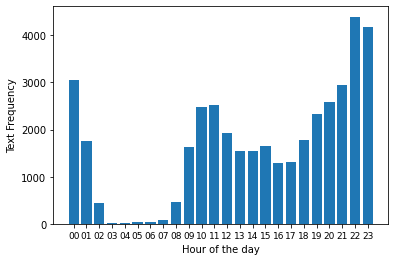

In [73]:
data = df.groupby(df.Hour).count()['Text']
labels = [x for x in data.index]

plt.bar(labels, data)
plt.xticks(labels, size = 9)
plt.xlabel('Hour of the day')
plt.ylabel('Text Frequency')
plt.show()

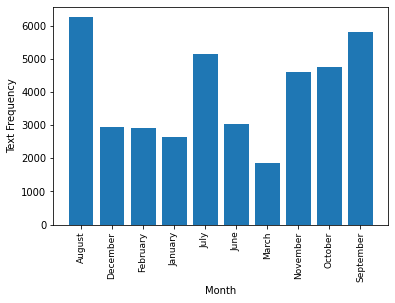

In [95]:
data = df.groupby(df.Month).count().iloc[:,0]
labels = [x for x in data.index]

plt.bar(labels, data)
plt.xticks(labels, rotation = 'vertical', size = 9)
plt.xlabel('Month')
plt.ylabel('Text Frequency')
plt.show()

In [68]:
len(labels)

24

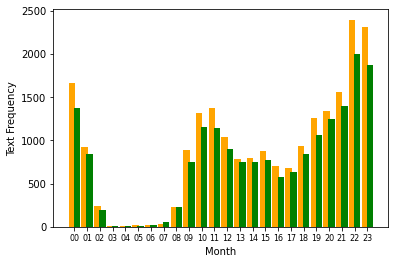

<Figure size 2880x21600 with 0 Axes>

In [107]:
from matplotlib.pyplot import figure


anubhav_hours = df.where(df.Sender == 'Anubhav').groupby('Hour').count()['Text']
bublasaur_hours = df.where(df.Sender == 'Bublasaur').groupby('Hour').count()['Text']

labels = [x for x in anubhav_hours.index]

X_axis = np.arange(len(labels))

plt.bar(X_axis-0.2, height = bublasaur_hours, width = 0.5, color = 'orange', align = 'center')
plt.bar(X_axis+0.2, height = anubhav_hours , width = 0.5, color = 'green', align = 'center')
plt.xticks(X_axis, labels, size = 8)
plt.xlabel('Month')
plt.ylabel('Text Frequency')
figure( figsize=(40, 300))
plt.show()